# LENET ARCHITECTURE

In [10]:
import warnings
warnings.filterwarnings('ignore')

# import os
# os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

In [11]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [12]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation

2.18.0


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'New folder/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 446 images belonging to 7 classes.


In [14]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'New folder/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 446 images belonging to 7 classes.


In [15]:
MODEL=Sequential()
MODEL.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(3,3), input_shape=(224,224,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(3,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Flatten())
MODEL.add(Dense(256, activation='relu'))
MODEL.add(Dense(7, activation='softmax'))

OPT    = tensorflow.keras.optimizers.Adam(0.001)

MODEL.compile(optimizer=OPT,loss='categorical_crossentropy',metrics=["accuracy", tensorflow.keras.metrics.Precision(), tensorflow.keras.metrics.Recall()])
MODEL.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 74, 74, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,219,591 (4.65 MB)

 Trainable params: 1,219,591 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_path = "LENET.h5"

from tensorflow.keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [26]:
epochs = 10
batch_size = 32

In [30]:
WORKING = MODEL.fit(
    train_data, 
    steps_per_epoch=train_data.samples // batch_size, 
    epochs=epochs, 
    validation_data=test_data, 
    validation_steps=test_data.samples // batch_size,
    callbacks=[M]
)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.3161 - loss: 1.6052 - precision: 0.5734 - recall: 0.1393
Epoch 1: accuracy improved from -inf to 0.37440, saving model to LENET.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.3202 - loss: 1.5927 - precision: 0.5893 - recall: 0.1442 - val_accuracy: 0.5096 - val_loss: 1.0771 - val_precision: 1.0000 - val_recall: 0.3341
Epoch 2/10
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5938 - loss: 0.9658 - precision: 1.0000 - recall: 0.4062
Epoch 2: accuracy improved from 0.37440 to 0.59375, saving model to LENET.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 340ms/step - accuracy: 0.5938 - loss: 0.9658 - precision: 1.0000 - recall: 0.4062 - val_accuracy: 0.5144 - val_loss: 1.0140 - val_precision: 1.0000 - val_recall: 0.3413
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.7084 - loss: 0.8953 - precision: 1.0000 - recall: 0.4015
Epoch 3: accuracy improved from 0.59375 to 0.80193, saving model to LENET.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 921ms/step - accuracy: 0.7151 - loss: 0.8821 - precision: 1.0000 - recall: 0.4104 - val_accuracy: 0.8269 - val_loss: 0.4165 - val_precision: 1.0000 - val_recall: 0.6731
Epoch 4/10
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9688 - loss: 0.3497 - precision: 1.0000 - recall: 0.7188
Epoch 4: accuracy improved from 0.80193 to 0.96875, saving model to LENET.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 450ms/step - accuracy: 0.9688 - loss: 0.3497 - precision: 1.0000 - recall: 0.7188 - val_accuracy: 0.9928 - val_loss: 0.3251 - val_precision: 1.0000 - val_recall: 0.8269
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.9887 - loss: 0.2254 - precision: 0.9991 - recall: 0.9151
Epoch 5: accuracy improved from 0.96875 to 0.99275, saving model to LENET.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9890 - loss: 0.2212 - precision: 0.9990 - recall: 0.9186 - val_accuracy: 0.9928 - val_loss: 0.0590 - val_precision: 0.9928 - val_recall: 0.9928
Epoch 6/10
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.0569 - precision: 1.0000 - recall: 1.0000
Epoch 6: accuracy improved from 0.99275 to 1.00000, saving model to LENET.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - accuracy: 1.0000 - loss: 0.0569 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9928 - val_loss: 0.0503 - val_precision: 0.9928 - val_recall: 0.9928
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.9962 - loss: 0.0410 - precision: 0.9962 - recall: 0.9962
Epoch 7: accuracy did not improve from 1.00000
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9959 - loss: 0.0416 - precision: 0.9959 - recall: 0.9959 - val_accuracy: 0.9952 - val_loss: 0.0261 - val_precision: 0.9952 - val_recall: 0.9952
Epoch 8/10
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0130 - precision: 1.0000 - recall: 1.0000
Epoch 8: accuracy did not improve from 1.00000
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 349ms/step - accuracy: 1.0000 - loss: 0.0130 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9928 - val_loss: 0.0602 - val_precision: 0.9928 - val_recall: 0.9928
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.

In [32]:
WORKING.history.keys()


dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

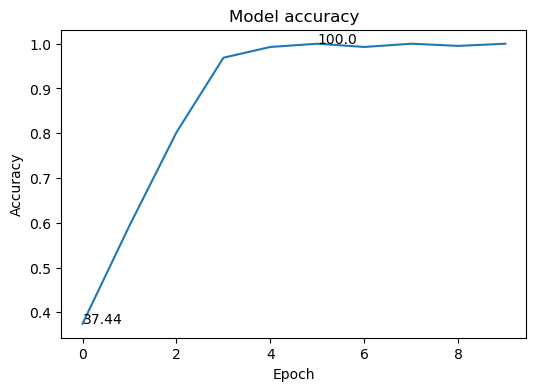

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 4))
plt.plot(WORKING.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['accuracy'][i]*100,2),xy=(i,WORKING.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

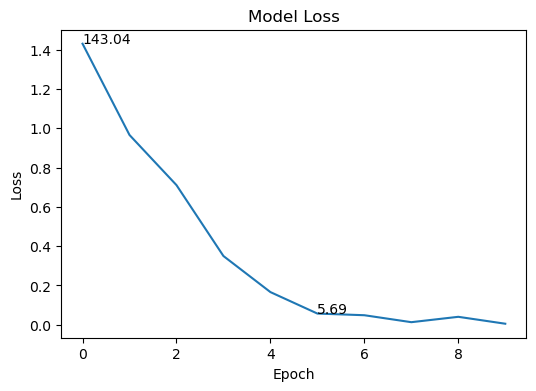

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(WORKING.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['loss'][i]*100,2),xy=(i,WORKING.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()